In [5]:
import pandas as pd
import plotly.graph_objs as go

In [46]:
df2 = pd.read_csv('../assets/usa-2011-agriculture.csv')
df2.shape

(50, 17)

In [47]:
# read in the data

df = pd.read_csv('../assets/us_world_export_data_2022.csv')
pd.DataFrame(df2.dtypes, columns=["DataType"])

,DataType
code,object
state,object
category,object
total exports,float64
beef,float64
pork,float64
poultry,float64
dairy,float64
fruits fresh,float64
fruits proc,float64


In [12]:
# each row is a state
df.head()

,State,Commodity,Commodity name,Country,Dollar value,Fiscal year,Fiscal quarter,Trade type,Fiscal quarter description
0,AK,0095AT,Live animals,World,50000,2022,1,Exports,Fiscal Quarter 1
1,AK,0115AT,"Other feeds, meals, and fodders",World,402830,2022,1,Exports,Fiscal Quarter 1
2,AK,0125AT,"Sugar, sweeteners, bev. bases",World,25000,2022,1,Exports,Fiscal Quarter 1
3,AK,0127AT,Essential oils,World,87084,2022,1,Exports,Fiscal Quarter 1
4,AK,0150AT,Pork and pork products,World,57629,2022,1,Exports,Fiscal Quarter 1


In [13]:
# missing data?
df.isnull().sum()

State                         0
Commodity                     0
Commodity name                0
Country                       0
Dollar value                  0
Fiscal year                   0
Fiscal quarter                0
Trade type                    0
Fiscal quarter description    0
dtype: int64

In [26]:
#Divide dollar amount by a million
df["Dollar value"] = df["Dollar value"].astype(int) / 1000000
df.head()

,State,Commodity,Commodity name,Country,Dollar value,Fiscal year,Fiscal quarter,Trade type,Fiscal quarter description
0,AK,0095AT,Live animals,World,0.0,2022,1,Exports,Fiscal Quarter 1
1,AK,0115AT,"Other feeds, meals, and fodders",World,0.0,2022,1,Exports,Fiscal Quarter 1
2,AK,0125AT,"Sugar, sweeteners, bev. bases",World,0.0,2022,1,Exports,Fiscal Quarter 1
3,AK,0127AT,Essential oils,World,0.0,2022,1,Exports,Fiscal Quarter 1
4,AK,0150AT,Pork and pork products,World,0.0,2022,1,Exports,Fiscal Quarter 1


In [61]:
#Updated data frame with dollar amount in millions
final = df.groupby(["State", "Commodity name"])["Dollar value"].aggregate("sum").unstack()
#ndf1.head()
final = final.fillna(0)
#ndf1.head()
final.loc[:, final.columns != 'State'] = final.loc[:, final.columns != 'State'] / 1000000
final.loc[:, final.columns != 'State'] = final.loc[:, final.columns != 'State'].round(2)
final.head()

Commodity name,Animal fats,"Bakery goods, cereals, and pasta",Beef and beef products,Beer,Chocolate and cocoa products,Coarse grains (ex. corn),Condiments and sauces,Confectionery,Corn,Cotton,...,Rice,Soybean meal,Soybean oil,Soybeans,"Sugar, sweeteners, bev. bases",Tobacco,Tree nuts,Vegetable oils (ex. soybean),Wheat,Wine and related products
State,,,,,,,,,,,,,,,,,,,,,
AK,0.00,0.01,0.04,0.35,0.00,0.00,0.05,0.02,0.00,0.27,...,0.04,0.00,0.00,0.00,0.02,0.02,0.00,0.00,0.00,0.13
AL,0.40,0.18,6.87,0.00,0.78,0.00,0.68,0.35,0.05,18.90,...,0.00,0.00,4.89,318.97,9.46,0.00,0.16,2.00,0.00,0.00
AR,0.96,7.53,7.65,0.00,0.01,0.00,1.34,27.66,0.00,128.31,...,147.45,0.01,0.00,3.65,27.68,0.00,0.06,1.39,0.00,0.16
AZ,3.92,4.64,119.14,0.01,3.98,0.06,2.41,34.02,0.00,80.90,...,0.44,0.21,0.24,0.00,34.02,0.06,15.08,9.50,21.95,0.11
CA,13.48,259.95,610.46,33.03,118.59,0.59,242.39,741.03,5.85,337.35,...,314.61,13.32,8.76,58.29,725.55,0.03,4737.49,125.82,0.19,618.10


In [19]:
#old dataframe for safekeeping - in case something goes wrong
ndf = df.groupby(["State", "Commodity name"])["Dollar value"].aggregate("sum").unstack()
ndf.head()
ndf = ndf.fillna(0)
ndf.head()

Commodity name,Animal fats,"Bakery goods, cereals, and pasta",Beef and beef products,Beer,Chocolate and cocoa products,Coarse grains (ex. corn),Condiments and sauces,Confectionery,Corn,Cotton,...,Rice,Soybean meal,Soybean oil,Soybeans,"Sugar, sweeteners, bev. bases",Tobacco,Tree nuts,Vegetable oils (ex. soybean),Wheat,Wine and related products
State,,,,,,,,,,,,,,,,,,,,,
AK,0.0,8000.0,41878.0,345858.0,0.0,0.0,53844.0,25000.0,0.0,272902.0,...,35549.0,0.0,0.0,0.0,25000.0,15350.0,0.000000e+00,0.0,0.0,125333.0
AL,399729.0,182656.0,6871069.0,0.0,779015.0,0.0,683250.0,350122.0,47160.0,18899384.0,...,0.0,0.0,4886290.0,318974495.0,9458664.0,0.0,1.587330e+05,2004674.0,0.0,0.0
AR,963647.0,7528036.0,7647824.0,0.0,6705.0,0.0,1337571.0,27663935.0,0.0,128308943.0,...,147449013.0,6783.0,0.0,3648077.0,27678133.0,0.0,6.374500e+04,1392569.0,0.0,164660.0
AZ,3918467.0,4637579.0,119135272.0,14457.0,3982636.0,60752.0,2409180.0,34024989.0,0.0,80903828.0,...,438842.0,211020.0,241842.0,0.0,34024157.0,63598.0,1.508005e+07,9503559.0,21949024.0,110000.0
CA,13484131.0,259952832.0,610460336.0,33033725.0,118592026.0,588734.0,242391295.0,741029016.0,5847216.0,337353779.0,...,314608659.0,13323924.0,8760666.0,58288660.0,725545724.0,31354.0,4.737490e+09,125816053.0,192466.0,618103825.0


In [62]:
final.reset_index(inplace = True)
final.head()

Commodity name,State,Animal fats,"Bakery goods, cereals, and pasta",Beef and beef products,Beer,Chocolate and cocoa products,Coarse grains (ex. corn),Condiments and sauces,Confectionery,Corn,...,Rice,Soybean meal,Soybean oil,Soybeans,"Sugar, sweeteners, bev. bases",Tobacco,Tree nuts,Vegetable oils (ex. soybean),Wheat,Wine and related products
0,AK,0.00,0.01,0.04,0.35,0.00,0.00,0.05,0.02,0.00,...,0.04,0.00,0.00,0.00,0.02,0.02,0.00,0.00,0.00,0.13
1,AL,0.40,0.18,6.87,0.00,0.78,0.00,0.68,0.35,0.05,...,0.00,0.00,4.89,318.97,9.46,0.00,0.16,2.00,0.00,0.00
2,AR,0.96,7.53,7.65,0.00,0.01,0.00,1.34,27.66,0.00,...,147.45,0.01,0.00,3.65,27.68,0.00,0.06,1.39,0.00,0.16
3,AZ,3.92,4.64,119.14,0.01,3.98,0.06,2.41,34.02,0.00,...,0.44,0.21,0.24,0.00,34.02,0.06,15.08,9.50,21.95,0.11
4,CA,13.48,259.95,610.46,33.03,118.59,0.59,242.39,741.03,5.85,...,314.61,13.32,8.76,58.29,725.55,0.03,4737.49,125.82,0.19,618.10


In [48]:
pd.DataFrame(ndf1.dtypes, columns=["DataType"])

,DataType
Commodity name,
Animal fats,float64
"Bakery goods, cereals, and pasta",float64
Beef and beef products,float64
Beer,float64
Chocolate and cocoa products,float64
Coarse grains (ex. corn),float64
Condiments and sauces,float64
Confectionery,float64
Corn,float64


In [21]:
# make a list of columns
list_of_columns=list(ndf.columns)
#list_of_columns.remove('state')
#list_of_columns.remove('category')
#list_of_columns.remove('code')
list_of_columns

['Animal fats',
 'Bakery goods, cereals, and pasta',
 'Beef and beef products',
 'Beer',
 'Chocolate and cocoa products',
 'Coarse grains (ex. corn)',
 'Condiments and sauces',
 'Confectionery',
 'Corn',
 'Cotton',
 'Dairy products',
 'Dextrins, peptones, and proteins',
 'Distilled spirits',
 'Distillers grains',
 'Dog and cat food',
 'Eggs and products',
 'Essential oils',
 'Ethanol (non-bev.)',
 'Food preparations',
 'Fresh fruit',
 'Fresh vegetables',
 'Fruit and vegetable juices',
 'Hay',
 'Hides and skins',
 'Live animals',
 'Meat products NESOI',
 'Milled grains and products',
 'Non-alcoholic bev. (ex. juices)',
 'Nursery products and cut flowers',
 'Oilseeds (ex. soybean)',
 'Other feeds, meals, and fodders',
 'Planting seeds',
 'Pork and pork products',
 'Poultry meat and products (ex. eggs)',
 'Processed fruit',
 'Processed vegetables',
 'Pulses',
 'Rice',
 'Soybean meal',
 'Soybean oil',
 'Soybeans',
 'Sugar, sweeteners, bev. bases',
 'Tobacco',
 'Tree nuts',
 'Vegetable oils

In [63]:
final.to_csv('../assets/us-exports-2022.csv')

In [40]:
# data objects
go.Bar
go.Scatter
go.Pie
go.Choropleth

# figure objects
#go.Format
#go.Figure


plotly.graph_objs._choropleth.Choropleth

In [64]:
data=go.Choropleth(
    locations=final['State'], # Spatial coordinates
    locationmode = 'USA-states', # set of locations match entries in `locations`
    z = final['Corn'], # Data to be color-coded
    colorscale = ['lightgrey','blue'],
    colorbar_title = 'some title',
)
data

Choropleth({
    'colorbar': {'title': {'text': 'some title'}},
    'colorscale': [[0.0, 'lightgrey'], [1.0, 'blue']],
    'locationmode': 'USA-states',
    'locations': array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
                        'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
                        'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
                        'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI',
                        'VT', 'WA', 'WI', 'WV', 'WY', 'XX'], dtype=object),
    'z': array([0.00000e+00, 5.00000e-02, 0.00000e+00, 0.00000e+00, 5.85000e+00,
                5.95000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.13000e+00,
                6.00000e-02, 0.00000e+00, 7.57250e+02, 0.00000e+00, 5.76130e+02,
                2.22500e+01, 2.91390e+02, 3.83000e+00, 4.89541e+03, 0.00000e+00,
                1.16000e+00, 3.00000e-02, 2.33100e+01, 5.67040e

In [16]:
fig = go.Figure([data])
fig.update_layout(
        title_text = 'Exports',
        geo_scope='usa',
        width=1200,
        height=800
    )
fig.write_html('iowa-corn.html')
fig

In [105]:
# make a function that can intake any varname and produce a map.
def make_figure(varname):
    myheading1 = f"Wow! That's a lot of {varname}!"
    mygraphtitle = f'2011 {varname} exports, by state'
    mycolorscale = 'viridis' # Note: The error message will list possible color scales.
    mycolorbartitle = "Millions USD"

    data=go.Choropleth(
        locations=final['State'], # Spatial coordinates
        locationmode = 'USA-states', # set of locations match entries in `locations`
        z = final[varname].astype(float), # Data to be color-coded
        colorscale = mycolorscale,
        colorbar_title = mycolorbartitle,
    )


    fig = go.Figure(data)
    fig.update_layout(
        title_text = mygraphtitle,
        geo_scope='usa',
        width=1200,
        height=800
    )
    return fig

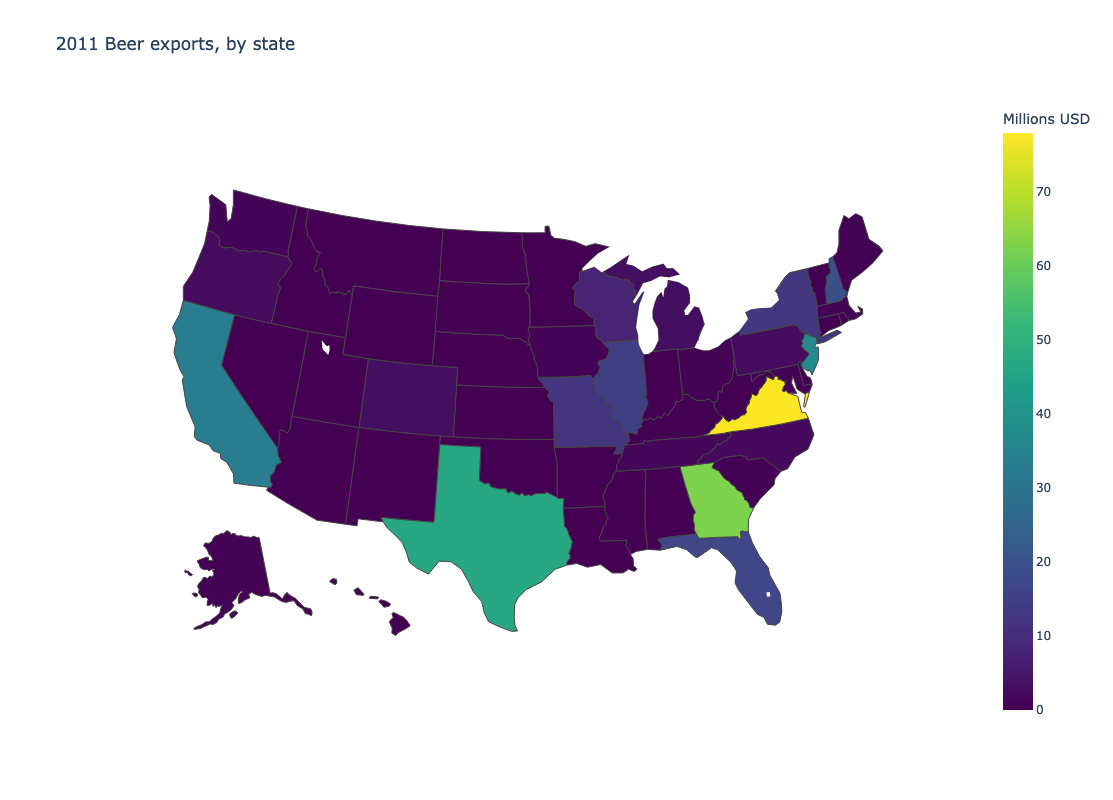

In [106]:
fig=make_figure('Beer')
fig